# Exercice 4 - Calcul d'orbite : analyse d'un fichier d'orbite

### Chargement du fichier d'orbite

In [8]:
import pandas as pd
data = pd.read_csv('extract_orbite',
                    sep=' ',
                    names=['date','nb_of_sec','x','y','z','v_x','v_y','v_z'],
                    index_col=False,
                    header = 1)
data

,date,nb_of_sec,x,y,z,v_x,v_y,v_z
0,25965,90.0,7.676584e+06,9.416919e+06,2.074684e+06,2078.263900,-525.168390,-5254.624034
1,25965,180.0,7.856955e+06,9.361547e+06,1.600113e+06,1929.389714,-705.142024,-5289.874808
2,25965,270.0,8.023775e+06,9.290031e+06,1.122780e+06,1777.209954,-883.873822,-5315.990789
3,25965,360.0,8.176761e+06,9.202496e+06,6.435100e+05,1621.985233,-1061.059086,-5332.929832
4,25965,450.0,8.315649e+06,9.099096e+06,1.631291e+05,1463.981127,-1236.395842,-5340.665161
...,...,...,...,...,...,...,...,...
8639,25974,0.0,-6.004062e+06,-9.709677e+06,-4.369468e+06,-2755.268866,-525.495359,4987.306223
8640,25974,90.0,-6.246656e+06,-9.748374e+06,-3.916877e+06,-2634.902046,-334.316175,5068.793054
8641,25974,180.0,-6.478203e+06,-9.769834e+06,-3.457354e+06,-2509.839508,-142.488894,5141.331833
8642,25974,270.0,-6.698292e+06,-9.774013e+06,-2.991710e+06,-2380.303100,49.642485,5204.787136


Date sous forme d'objet datetime.datetime et utilisation comme index du DataFrame:

In [31]:
import datetime as dt
origin = dt.datetime(year=2021,month=2,day=2) - dt.timedelta(days=25965)
date_swap = data[['date','nb_of_sec']].to_numpy()

data['Datetime'] = pd.Series([origin + dt.timedelta(days=date_swap[i][0],seconds=date_swap[i][1]) for i in range(date_swap.shape[0]) ])
data = data.set_index('Datetime')
data

,date,nb_of_sec,x,y,z,v_x,v_y,v_z
Datetime,,,,,,,,
2021-02-02 00:01:30,25965,90.0,7.676584e+06,9.416919e+06,2.074684e+06,2078.263900,-525.168390,-5254.624034
2021-02-02 00:03:00,25965,180.0,7.856955e+06,9.361547e+06,1.600113e+06,1929.389714,-705.142024,-5289.874808
2021-02-02 00:04:30,25965,270.0,8.023775e+06,9.290031e+06,1.122780e+06,1777.209954,-883.873822,-5315.990789
2021-02-02 00:06:00,25965,360.0,8.176761e+06,9.202496e+06,6.435100e+05,1621.985233,-1061.059086,-5332.929832
2021-02-02 00:07:30,25965,450.0,8.315649e+06,9.099096e+06,1.631291e+05,1463.981127,-1236.395842,-5340.665161
...,...,...,...,...,...,...,...,...
2021-02-11 00:00:00,25974,0.0,-6.004062e+06,-9.709677e+06,-4.369468e+06,-2755.268866,-525.495359,4987.306223
2021-02-11 00:01:30,25974,90.0,-6.246656e+06,-9.748374e+06,-3.916877e+06,-2634.902046,-334.316175,5068.793054
2021-02-11 00:03:00,25974,180.0,-6.478203e+06,-9.769834e+06,-3.457354e+06,-2509.839508,-142.488894,5141.331833


<AxesSubplot:xlabel='Datetime'>

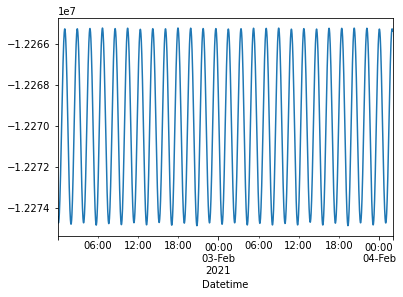

In [32]:
import numpy as np
MU = 3.986004418e14 # Gravitational constant times Earth mass

# Norm of speed and position vector
data['r'] = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)
data['v'] = np.sqrt(data['v_x']**2 + data['v_y']**2 + data['v_z']**2)

# Semi major-axis computation
data['a'] = MU / ( data['v']**2 - 2*MU/data['r'] )

# Plotting
data['a'][:2000].plot()